# FUSION DE IMAGENES: RGB HI + MULTIESPECTRAL HI usando PCA



---
**JUAN C. VEGA**

GEOFISICO MSC
ESPECIALISTA EN IA


**UNIVERSIDAD DE LOS ANDES**

**EDCO**

2024

Sesion fusion de imagenes


**Objetivos**


---

1. Cargar imagenes RGB y multiespectrales adquridas con UAV

2. Generar el ortofotomosaico de la imagen multiespectral

3. Optimizar la resolucion espacial de las imagenes espectrales.

4. Visualizar las bandas optimizadas


**Datos relevantes**


---

1. Las imagenes RGB y multiespectrales Micasense fueron adquiridas a la misma altura, 120m

2. La resolucion de las imagenes RGB es de 2 cm/pixel y la resolucion de las imagenes espectrales es de 8 cm/pixel

3. La imagen RGB es el ortofotomosaico de 45 imagenes georeferenciadas y tiene las dimensiones 6514x6294 pixeles

4. son 66 imagenes espectrales con 5 bandas cada una: R,G,B,NIR y RE

# Importar todas las bibliotecas necesarias al inicio del código

In [ ]:
!pip install rasterio

from google.colab import drive
import cv2
import rasterio
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from osgeo import gdal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.0 MB/s eta 0:00:00


In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga de imagenes RGB

In [ ]:
# Función para cargar una imagen RGB
def load_rgb_image(path):
    image = cv2.imread(path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Función para crear un mosaico
def create_mosaic(input_files, output_file):

    pass

# PCA y fusion de imagenes

In [ ]:
def pca_fusion(rgb_image, multispectral_image): # AQUI TENEMOS DOS ARGUMENTOS PARA LA FUSION
    # Aplanar las imágenes para PCA
    rgb_flatten = rgb_image.reshape(-1, 3)
    multi_flatten = multispectral_image.reshape(-1, multispectral_image.shape[2])

    # Aplicar PCA para reducir la dimensionalidad de la imagen multiespectral a 3 componentes principales
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(multi_flatten)

    # Fusionar componentes principales con la imagen RGB
    fused_flatten = np.hstack((rgb_flatten, pca_result))

    # Reconstruir la imagen fusionada
    fused_image = fused_flatten.reshape(rgb_image.shape[0], rgb_image.shape[1], 6) #Reconstruir la imagen a su forma original

    return fused_image


Las imágenes se aplanan (flatten) para convertirlas en una forma de dos dimensiones:

**rgb_flatten:** convierte la imagen RGB a un arreglo de forma (n, 3), donde n es el número total de píxeles y 3 corresponde a las tres bandas de color (Rojo, Verde y Azul).
**multi_flatten:** convierte la imagen multiespectral a un arreglo de forma (n, m), donde n es el número total de píxeles y m es el número de bandas espectrales en la imagen multiespectral.

Se crea una instancia de **PCA**, especificando que se desea reducir la dimensionalidad de la imagen multiespectral a 3 componentes principales.
Se aplica PCA a los datos aplanados de la imagen multiespectral mediante fit_transform, lo que significa que se ajusta el modelo PCA a los datos y se transforman los datos en las nuevas componentes principales.

Se fusionan los datos aplanados de la imagen RGB con los componentes principales obtenidos de la imagen multiespectral. La función np.hstack se utiliza para apilar los arreglos horizontalmente, formando un nuevo arreglo que contiene tanto la información RGB como las nuevas componentes espectrales.

**La función devuelve la imagen fusionada, que contiene tanto la información de color de la imagen RGB como las características espectrales de la imagen multiespectral.**

In [ ]:
# Cargar y crear el mosaico de imágenes RGB
#input_files = [f"/path/to/your/files/DJI_{i:0}.tif" for i in range(371, 393) for j in range(0, 2)]
output_file = "/path/to/output/mosaicRGB.tif" # la ruta donde van a guardar el ortofotomosaico creado en python
create_mosaic(input_files, output_file)

In [ ]:
# Cargar la imagen RGB
rgb_image_path = "/content/drive/MyDrive/Colab Notebooks/Sesion 2a/HeberORTO.tif" # creada en PIX4D
rgb_image = load_rgb_image(rgb_image_path)

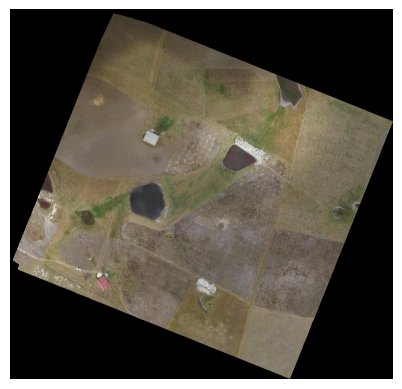

In [ ]:
# Mostrar la imagen RGB
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

# Carga de imagenes multiespectrales

In [ ]:
# Cargar y crear el mosaico de imágenes multiespectrales
input_files = [f"/path/to/your/files/IMG_{i:04d}_BANDA_{j}.tif" for i in range(4, 67) for j in range(1, 6)]
output_file = "/path/to/output/mosaic_multiespectral.tif"
create_mosaic(input_files, output_file)

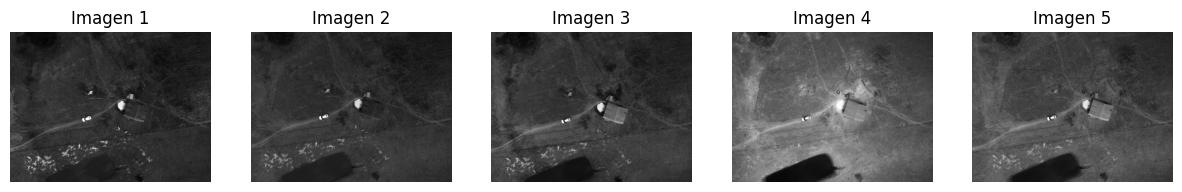

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt

# Rutas a los archivos de imágenes
file_paths = [
    "/content/drive/MyDrive/Colab Notebooks/multiespectral/IMG_0005_1.tif",
    "/content/drive/MyDrive/Colab Notebooks/multiespectral/IMG_0005_2.tif",
    "/content/drive/MyDrive/Colab Notebooks/multiespectral/IMG_0005_3.tif",
    "/content/drive/MyDrive/Colab Notebooks/multiespectral/IMG_0005_4.tif",
    "/content/drive/MyDrive/Colab Notebooks/multiespectral/IMG_0005_5.tif"
]

# Inicializar figura y ejes para matplotlib
fig, axs = plt.subplots(1, len(file_paths), figsize=(15, 5))

# Graficar cada imagen
for i, file_path in enumerate(file_paths):
    # Leer imagen con GDAL
    dataset = gdal.Open(file_path)
    if dataset is None:
        print(f"No se pudo abrir el archivo: {file_path}")
        continue

    # Convertir a matriz NumPy
    band = dataset.GetRasterBand(1)  # Asume que solo hay una banda; cambia este número si hay más bandas
    image_array = band.ReadAsArray()

    # Graficar
    axs[i].imshow(image_array, cmap="gray")
    axs[i].set_title(f"Imagen {i+1}")
    axs[i].axis("off")

plt.show()


# Fusion de imagenes RGB + Multiespectral

In [ ]:
# Realizar PCA y fusión de imágenes

multispectral_image = np.zeros_like(rgb_image)
imagen_fusionada = pca_fusion(rgb_image, multispectral_image)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


# RESULTADOS

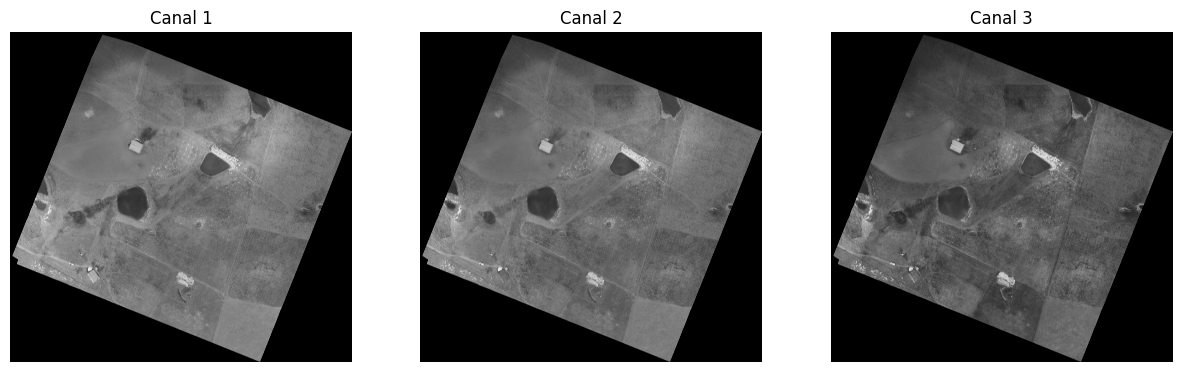

In [ ]:
# Visualizar los primeros 3 canales
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(fused_image[:, :, i], cmap='gray')
    plt.title(f'Canal {i+1}')
    plt.axis('off')

plt.show()



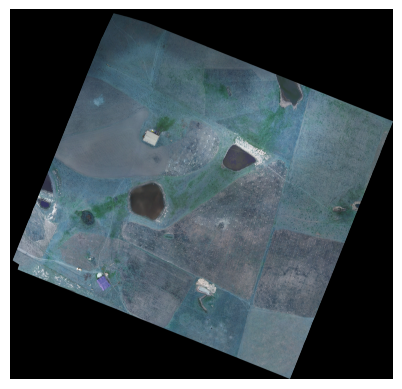

In [ ]:
plt.imshow(cv2.cvtColor(fused_image[:, :, :3].astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# **Resumen de Funcionalidad**
**Objetivo:** La función pca_fusion fusiona una imagen RGB y una imagen multiespectral utilizando PCA para reducir la dimensionalidad de la imagen multiespectral a 3 componentes principales.

**Salida:** La función devuelve una imagen fusionada que combina la información de color de la imagen RGB con las características espectrales relevantes extraídas de la imagen multiespectral, permitiendo un análisis y visualización más ricos.

# DISCUSION DE RESULTADOS

---

1. Que mas se podria hacer?
2. Como mejoramos el codigo?
3. Que otros resultados se pueden obtener?
4. Que aplicaciones tiene el codigo?
5. lecciones aprendidas